In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, sys
path = os.getcwd()
while not path.endswith('research'):    
    path = os.path.abspath(os.path.join(path, '../'))
sys.path.append(path)

***

In [3]:
import sys
sys.path.append(r'C:\git\smartdata')

import smartdata
from smartdata.utils.common import print_attributes as pa
from smartdata.utils.dframe import display_full_df as ddff
from smartdata.utils.common import to_namedtuple
from smartdata.utils.file import read_from_json, create_file_name
from smartdata import SmartData

In [4]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

In [5]:
from datetime import datetime, date
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import time

In [6]:
from gmt.fom.gas.shared.utils.common import *
from gmt.fom.gas.shared.utils.dframe import *

In [7]:
from gmt.fom.gas.shared.models.stpb.data.mongo import MongoAdapter

In [8]:
figsize=(8*1.6, 8)

# Data

In [9]:
path = r'\\trading1\Common\gasmodels\short_term_power_burn\data\UK\dependent_var\power_view__power_station_fuel_type_demand.csv'

In [10]:
df = pd.read_csv(path)

In [11]:
df.head()

recordType startTimeOfHalfHrPeriod  settlementPeriod  ccgt  oil   coal  \
0     FUELHH              2015-02-22                 1  5293    0  12980   
1     FUELHH              2015-02-22                 2  5547    0  12947   
2     FUELHH              2015-02-22                 3  5168    0  13314   
3     FUELHH              2015-02-22                 4  4498    0  13421   
4     FUELHH              2015-02-22                 5  4660    0  13304   

   nuclear  wind  ps  npshyd  ...  intirl  intned  intew  biomass  intnem  \
0     7777  1456   0     681  ...       0    1002      0        0       0   
1     7772  1401   0     682  ...       0    1028      0        0       0   
2     7779  1604   0     594  ...       0     982      0        0       0   
3     7768  1548   0     592  ...       0    1010      0        0       0   
4     7778  1351   0     584  ...       0    1016      0        0       0   

   intelec  intifa2  intnsl  activeFlag             local_datetime  
0        0        0       0           Y  2015-02-22 00:00:00+00:00  
1        0        0       0           Y  2015-02-22 00:30:00+00:00  
2        0        0       0           Y  2015-02-22 01:00:00+00:00  
3        0        0       0           Y  2015-02-22 01:30:00+00:00  
4        0        0       0           Y  2015-02-22 02:00:00+00:00  

[5 rows x 23 columns]

In [12]:
df = to_pd_todatetime(df, 'local_datetime', utc=True)

In [13]:
df = to_pd_todatetime(df, 'startTimeOfHalfHrPeriod', day_only=True, utc=True)

In [14]:
df.index = pd.DatetimeIndex(df.set_index('local_datetime').index)

In [15]:
df = df.resample('1D').sum()

In [16]:
df.index.freq

<Day>

In [17]:
df
title='Sources'
curves = sorted(df.columns.tolist()[1:])

C:\Users\ashubert\Anaconda3\envs\gas_research\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


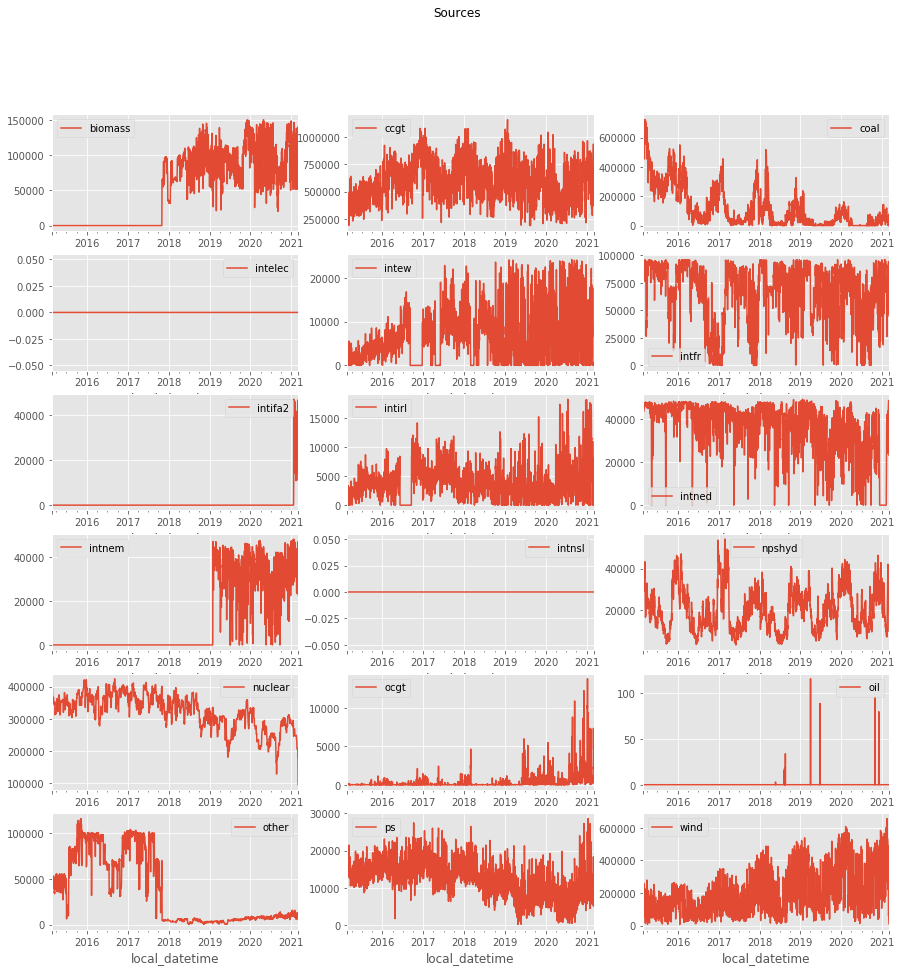

In [18]:
plot_to_grid(df, curves, title)

## Putting into Mongo

In [19]:
myData = MongoAdapter()

myData.mongo.choose_db(myData.GAS_MODELS_DB)

2021-04-20 13:35:22,243: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\data_sources\mongo.py: 25: DEBUG: Connected successfully.


In [20]:
collection = myData.STPB_POWER_VIEW_POWER_STATION_FUEL_TYPE_DEMAND
if collection not in myData.mongo.db.list_collection_names():
    myData.mongo.db.create_collection(name=collection)
    myData.mongo.choose_collection(collection)
else:
    myData.mongo.choose_collection(collection)
    myData.mongo.clear_collection()

In [21]:
time.sleep(5) #<---we need time to clean MongoDB collections

myData.mongo.pandas_to_mongo(df.reset_index())

2021-04-20 13:35:29,416: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\data_sources\mongo.py: 100: DEBUG: Saving 2202 rows to MongoDb.


***

***

# Retrieving

In [22]:
myData = MongoAdapter()

2021-04-20 13:35:56,963: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\data_sources\mongo.py: 25: DEBUG: Connected successfully.


In [23]:
df = myData.load_stpb_power_view_power_station_fuel_type_demand()

2021-04-20 13:35:57,752: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\models\stpb\stpb.py: 42: INFO: Retrieving....


In [24]:
df.head()

biomass    ccgt    coal  intelec  intew  intfr  intifa2  intirl  intned  \
0        0  331779  601531        0    774  71708        0    1116   47836   
1        0  362299  607829        0   4242  68826        0    3352   45280   
2        0  356612  639099        0   4022  67842        0    2684   48094   
3        0  497864  705281        0    860  70440        0     312   46932   
4        0  354787  609756        0   3630  79800        0    2672   45556   

   intnem  intnsl local_datetime  npshyd  nuclear  ocgt  oil  other     ps  \
0       0       0     2015-02-22   34619   371425     0    0  37275  16184   
1       0       0     2015-02-23   30135   371329     0    0  49217  13048   
2       0       0     2015-02-24   29625   371554     0    0  54187  16842   
3       0       0     2015-02-25   33843   377955     0    0  54636  17250   
4       0       0     2015-02-26   31340   393695     0    0  54169  18480   

   settlementPeriod    wind  
0              1176  180293  
1              1176  281900  
2              1176  270757  
3              1176  114735  
4              1176  245601

In [25]:
df.set_index('local_datetime', inplace=True)
title='Sources'
curves = sorted([c for c in df.columns.tolist() if c!= 'settlementPeriod'])

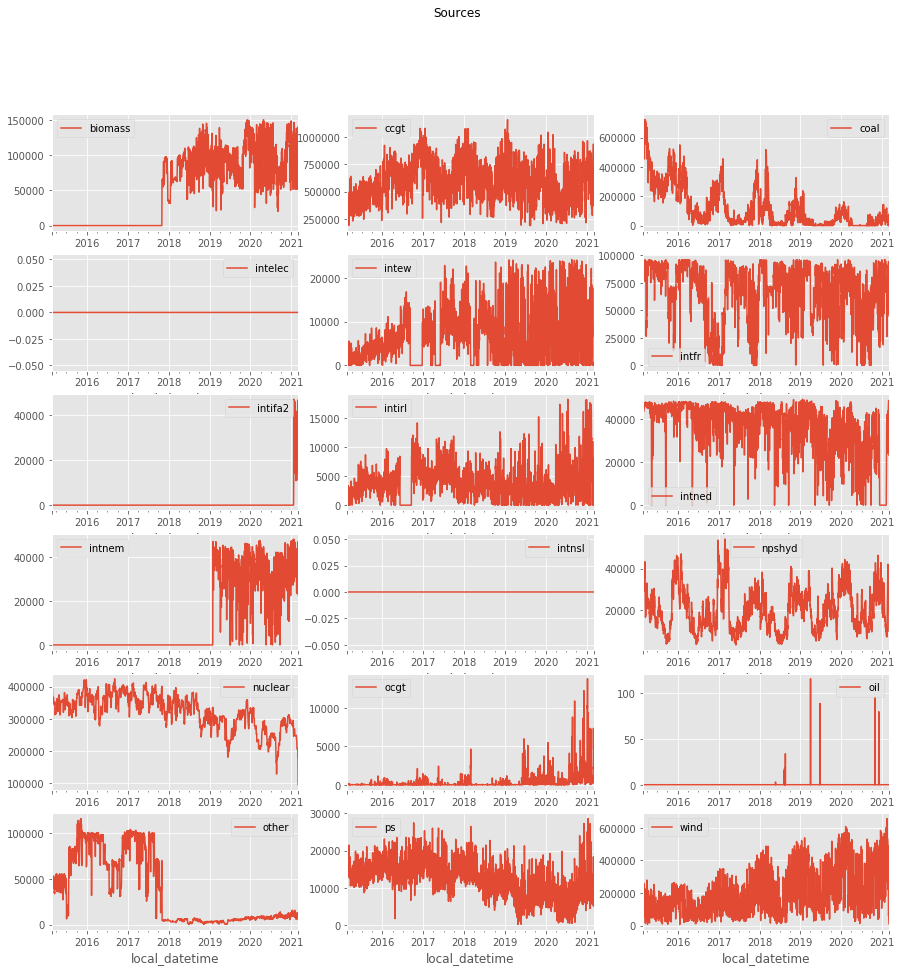

In [26]:
plot_to_grid(df, curves, title)